In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Задача №9.Как растет число обусловленности для случайной матрицы?
## Число обусловленности матрицы

Число обусловленности матрицы показывает насколько матрица близка к матрице неполного ранга (для квадратных матриц - к вырожденности).

Рассмотрим систему линейных уравнений

$$Ax=b$$

Если матрица A вырожденная, то для некоторых b решение x не существует, а для других b оно будет неединственным. Следовательно, если A почти вырожденная, то можно ожидать, что малые изменения в A и b вызовут очень большие изменения в x. Если же взять в качестве A единичную матрицу, то решение системы будет x=b. Следовательно, если A близка к единичной матрице, то малые изменения в A и b должны влеч за собой малые изменения в x.

## Для вычисления числа обусловленности матрицы в Python необходимо выполнить следующие шаги:
1. Задать матрицу в виде двумерного массива.

2. Вычислить определитель матрицы.

3. Вычислить обратную матрицу.

4. Найти максимальное и минимальное собственные значения обратной матрицы.

5. Вычислить число обусловленности матрицы как отношение максимального и минимального собственных значений.

### Код для выполнения этих шагов будет выглядеть следующим образом:

In [70]:
# Задать матрицу
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# Вычислить определитель матрицы
detA = np.linalg.det(A)
# Вычислить обратную матрицу
A_inv = np.linalg.inv(A)
# Найти максимальное и минимальное собственные значения обратной матрицы
eigvals = np.linalg.eigvals(A_inv)
max_eigval = max(eigvals)
min_eigval = min(eigvals)
# Вычислить число обусловленности матрицы
condA = abs(max_eigval / min_eigval)
# Вывести результаты
print("Матрица A:\n", A)
print("Определитель матрицы A:", detA)
print("Обратная матрица:\n", A_inv)
print("Максимальное собственное значение обратной матрицы:", max_eigval)
print("Минимальное собственное значение обратной матрицы:", min_eigval)
print("Число обусловленности матрицы A:", condA)

Матрица A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Определитель матрицы A: 6.66133814775094e-16
Обратная матрица:
 [[-4.50359963e+15  9.00719925e+15 -4.50359963e+15]
 [ 9.00719925e+15 -1.80143985e+16  9.00719925e+15]
 [-4.50359963e+15  9.00719925e+15 -4.50359963e+15]]
Максимальное собственное значение обратной матрицы: 4.0
Минимальное собственное значение обратной матрицы: -2.7021597764222976e+16
Число обусловленности матрицы A: 1.4802973661668753e-16


### Формулы, используемые в коде:
1. Определитель матрицы: $det(A)$
    
2. Обратная матрица: $A^-1$
    
3. Собственные значения матрицы: $eigvals(A)$
    
4. Максимальное и минимальное собственные значения: $max(eigvals)$, $min(eigvals)$
    
5. Число обусловленности матрицы: $cond(A) = |max(eigvals(A^-1)) / min(eigvals(A^-1))|$

## Шаги написания основной программы:
 1.Генерации случайной матрицы
    
 2.Вычисления числа обусловленности

 3.Построение массивов для хранения значений
    
 4.Генерация случайных матриц и вычисление

 5.Построение графика
    
 6.Подбор коэффициентов для функций $c1*n^p$ и $c2*n^p$

 7.Построение графиков функций $c1*n^p$ и $c2*n^p$

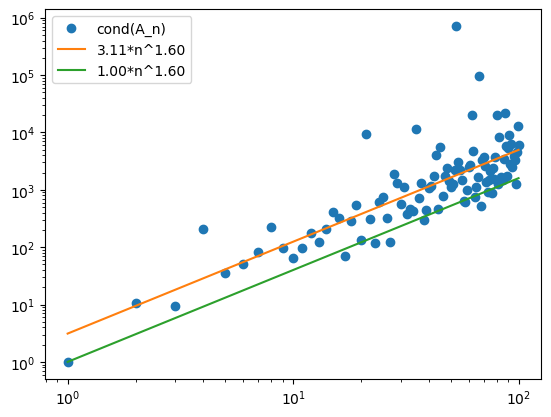

In [71]:
# функция для генерации случайной матрицы
def generate_random_matrix(n):
    return np.random.normal(0, 1, size=(n, n))
# функция для вычисления числа обусловленности
def cond(A):
    return np.linalg.norm(A, 1) * np.linalg.norm(np.linalg.inv(A), 1)
# порядок матриц
n_values = range(1, 101)
# массивы для хранения значений cond(A_n)
cond_values = []
# генерация случайных матриц и вычисление cond(A_n)
for n in n_values:
    A = generate_random_matrix(n)
    cond_values.append(cond(A))
# построение графика
plt.loglog(n_values, cond_values, 'o', label='cond(A_n)')
# подбор коэффициентов для функций c1*n^p и c2*n^p
p = np.polyfit(np.log(n_values), np.log(cond_values), 1)[0]
c1 = np.exp(np.polyfit(np.log(n_values), np.log(cond_values/n_values**p), 1)[1])
c2 = np.exp(np.polyfit(np.log(n_values), np.log(cond_values/n_values**p), 1)[0])
# построение графиков функций c1*n^p и c2*n^p
plt.loglog(n_values, c1*n_values**p, label=f'{c1:.2f}*n^{p:.2f}')
plt.loglog(n_values, c2*n_values**p, label=f'{c2:.2f}*n^{p:.2f}')
plt.legend()
plt.show()

## График числа обусловленности случайной матрицы

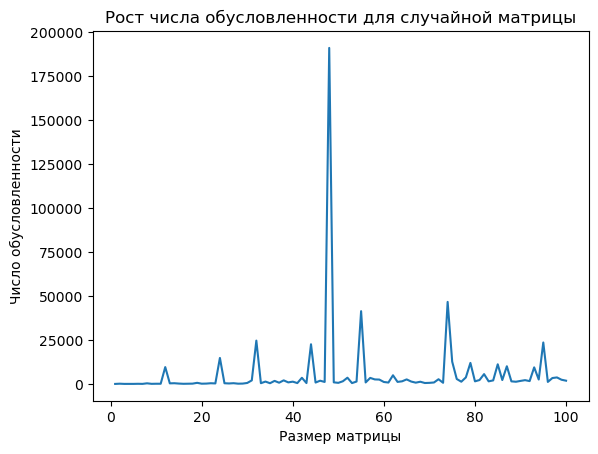

In [65]:
# задаем размеры матрицы
n = 10
# задаем диапазон значений для графика
start = 1
stop = 100
step = 1
# создаем пустые списки для значений числа обусловленности и соответствующих им размеров матриц
cond_nums = []
sizes = []
# генерируем случайные матрицы разных размеров и вычисляем их числа обусловленности
for size in range(start, stop+1, step):
    A = np.random.rand(size, size)
    cond_num = np.linalg.cond(A)
    cond_nums.append(cond_num)
    sizes.append(size)
# строим график числа обусловленности от размера матрицы
plt.plot(sizes, cond_nums)
plt.xlabel('Размер матрицы')
plt.ylabel('Число обусловленности')
plt.title('Рост числа обусловленности для случайной матрицы')
plt.show()